# State Machines in Python - Part 3

## Entry and Exit Actions

Below you the code from the signal light we had before. We just applied a slight change: The states `on` and `off` are now also detailed by dictionaries. Now they can specify entry actions, that are called when the state is entered. We just move the actions that we had previously on the transitions into the states.

Note that this also works for exit action, using the dictionary key `exit`, and you can have as many actions as you like, by separating them with a `;`.

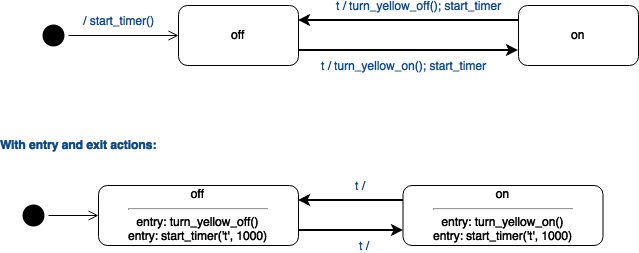

In [ ]:
from stmpy import Machine, Driver

import ipywidgets as widgets
from IPython.display import display

class SignalLight:
    
    def on_button_switch(self, b):
        self.stm.send('switch') # <---- here we send a message
        
    def on_button_terminate(self, b):
        self.stm.driver.stop() # <---- here we stop the driver
    
    def __init__(self):
        # load images and store them
        self.yellow_on = open("images/yellow_on.png", "rb").read()
        self.yellow_off = open("images/yellow_off.png", "rb").read()
        
        # display the user interface
        # a button
        self.button_switch = widgets.Button(description="Send 'switch'")
        self.button_switch.on_click(self.on_button_switch)
        # another button
        self.button_terminate = widgets.Button(description="Stop the Driver")
        self.button_terminate.on_click(self.on_button_terminate)
        # an image of a yellow light
        self.yellow = widgets.Image(value=self.yellow_off, format='png', width=50, height=50)
        # display everything
        display(self.yellow, self.button_switch, self.button_terminate)
        
    def turn_yellow_on(self):
        # switch on the yellow light
        self.yellow.set_trait(name='value', value=self.yellow_on)
        
    def turn_yellow_off(self):
        # switch off the yellow light
        self.yellow.set_trait(name='value', value=self.yellow_off)
        
signal = SignalLight()

t0 = {'source': 'initial',
      'target': 'off'}

# Change 1: effect is removed
t1 = {'trigger':'t',
      'source':'off',
      'target':'on'}

# Change 2: effect is removed here, too
t2 = {'trigger':'t', 
      'source':'on', 
      'target':'off'}

# Change 3: We declare dicts for the states
off = {'name': 'off',
       'entry': 'turn_yellow_off; start_timer("t", 1000)'
      }

on = {'name': 'on',
       'entry': 'turn_yellow_on; start_timer("t", 1000)'
      }

# Change 4: We pass the set of states to the state machine
machine = Machine(name='signal', transitions=[t0, t1, t2], obj=signal, states=[on, off])
signal.stm = machine

driver = Driver()
driver.add_machine(machine)
driver.start()